# Lines

### Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport  # formerly pandas_profiling
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredOffsetbox
from matplotlib.offsetbox import AuxTransformBox
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns

## Data reading

In [2]:
# Transport Medellin
transport_gdf = gpd.read_file("Data/Transport/Medellin_Lines.gpkg", layer="Medellin_Lines")

In [3]:
# Geo
# med_gdf = gpd.read_file("Data/Geo/LimiteComunaCorregimiento_2014.shp")

## Data review

### Retail

In [4]:
# Shape
transport_gdf.shape

(45868, 21)

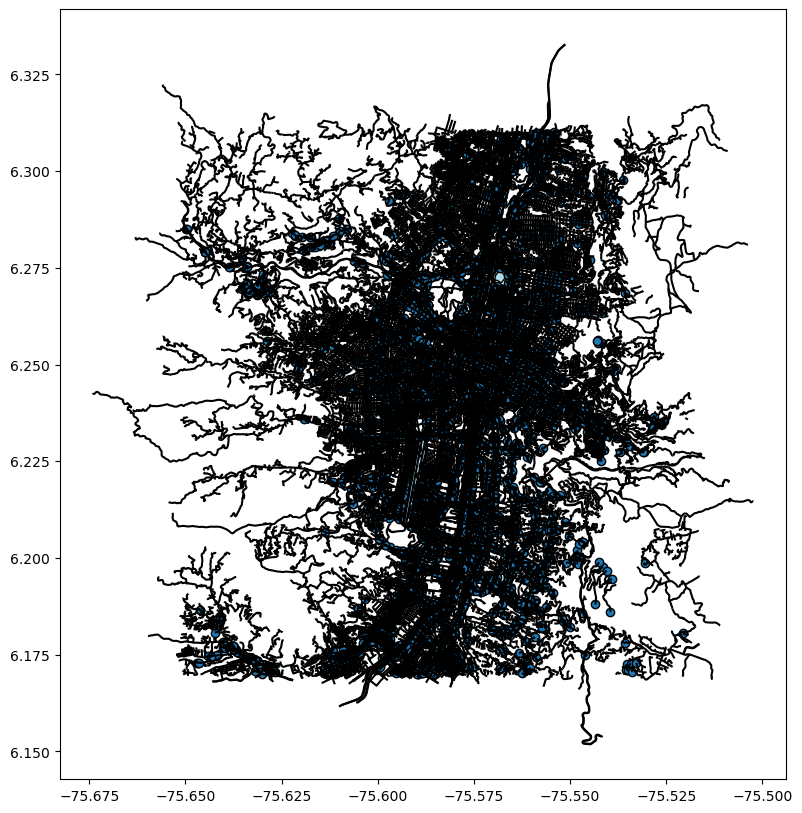

In [5]:
# Geometry
transport_gdf.plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

In [6]:
# Head
transport_gdf.head()

osm_id osm_type smoothness railway layer building operator barrier  \
0  11123634286    nodes       None    None  None     None     None    None   
1   5544207994    nodes       None    None  None     None     None    None   
2   5546798575    nodes       None    None  None     None     None    None   
3   7140104917    nodes       None    None  None     None     None    None   
4  11136570090    nodes       None    None  None     None     None    None   

  capacity amenity  ... oneway  name public_transport   highway surface width  \
0     None    None  ...   None  None             None  crossing    None  None   
1     None    None  ...   None  None             None  crossing    None  None   
2     None    None  ...   None  None             None  crossing    None  None   
3     None    None  ...   None  None             None      stop    None  None   
4     None    None  ...   None  None             None  crossing    None  None   

  parking tunnel bridge                   geometry  
0    None   None   None  POINT (-75.56679 6.29879)  
1    None   None   None  POINT (-75.57358 6.30018)  
2    None   None   None  POINT (-75.56902 6.30616)  
3    None   None   None  POINT (-75.57021 6.30025)  
4    None   None   None  POINT (-75.57019 6.30034)  

[5 rows x 21 columns]

In [7]:
# Tail
transport_gdf.tail()

osm_id   osm_type smoothness    railway layer building  \
45863  14519841  relations       None       None  None     None   
45864  12616700  relations       None  tram_stop  None      yes   
45865  12606519  relations       None  tram_stop  None      yes   
45866  12601988  relations       None  tram_stop  None      yes   
45867  12616591  relations       None  tram_stop  None      yes   

                operator barrier capacity amenity  ... oneway  \
45863               None    None     None    None  ...   None   
45864               None    None     None    None  ...   None   
45865  Metro de Medellín    None     None    None  ...   None   
45866  Metro de Medellín    None     None    None  ...   None   
45867               None    None     None    None  ...   None   

                        name public_transport  highway surface width parking  \
45863                   None             None  footway    None  None    None   
45864   Alejandro Echavarría          station     None    None  None    None   
45865  Pabellón del agua EPM          station     None    None  None    None   
45866               San José          station     None    None  None    None   
45867           Buenos Aires          station     None    None  None    None   

      tunnel bridge                                           geometry  
45863   None   None  POLYGON ((-75.61412 6.25328, -75.61392 6.253, ...  
45864   None   None  MULTIPOLYGON (((-75.54196 6.23566, -75.54162 6...  
45865   None   None  MULTIPOLYGON (((-75.56227 6.24566, -75.56178 6...  
45866   None   None  MULTIPOLYGON (((-75.56566 6.2474, -75.56518 6....  
45867   None   None  MULTIPOLYGON (((-75.55416 6.24147, -75.55368 6...  

[5 rows x 21 columns]

In [8]:
# Columns
transport_gdf.columns

Index(['osm_id', 'osm_type', 'smoothness', 'railway', 'layer', 'building',
       'operator', 'barrier', 'capacity', 'amenity', 'aeroway', 'oneway',
       'name', 'public_transport', 'highway', 'surface', 'width', 'parking',
       'tunnel', 'bridge', 'geometry'],
      dtype='object')

In [9]:
# Data type
transport_gdf.dtypes

osm_id                 int64
osm_type              object
smoothness            object
railway               object
layer                 object
building              object
operator              object
barrier               object
capacity              object
amenity               object
aeroway               object
oneway                object
name                  object
public_transport      object
highway               object
surface               object
width                 object
parking               object
tunnel                object
bridge                object
geometry            geometry
dtype: object

### Geo

In [10]:
# shape
# med_gdf.shape

In [11]:
# Geometry
# med_gdf.plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
# plt.show()

## EDA

### Non-spatial

In [12]:
# Drop geometry
transport_df = transport_gdf.drop(columns="geometry")

In [13]:
# Profile
profile = ProfileReport(transport_df, title="Data Profiling Report", explorative=True)

In [14]:
# Display result
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### osm_type

In [15]:
# Unique
transport_df['osm_type'].unique()

array(['nodes', 'ways_line', 'ways_poly', 'relations'], dtype=object)

##### Relations

In [16]:
# relations
transport_df[transport_df['osm_type']=='relations']

osm_id   osm_type smoothness    railway layer building  \
45858  12616592  relations       None  tram_stop  None      yes   
45859  12616593  relations       None  tram_stop  None      yes   
45860   6652553  relations       None       None  None     None   
45861  14421903  relations       None       None  None     None   
45862  12606520  relations       None  tram_stop  None      yes   
45863  14519841  relations       None       None  None     None   
45864  12616700  relations       None  tram_stop  None      yes   
45865  12606519  relations       None  tram_stop  None      yes   
45866  12601988  relations       None  tram_stop  None      yes   
45867  12616591  relations       None  tram_stop  None      yes   

                operator barrier capacity amenity aeroway oneway  \
45858               None    None     None    None    None   None   
45859               None    None     None    None    None   None   
45860               None    None     None    None    None   None   
45861               None    None     None    None    None   None   
45862  Metro de Medellín    None     None    None    None   None   
45863               None    None     None    None    None   None   
45864               None    None     None    None    None   None   
45865  Metro de Medellín    None     None    None    None   None   
45866  Metro de Medellín    None     None    None    None   None   
45867               None    None     None    None    None   None   

                        name public_transport     highway surface width  \
45858                 Loyola          station        None    None  None   
45859             Miraflores          station        None    None  None   
45860                   None             None  pedestrian    None  None   
45861                   None             None     footway    None  None   
45862           Bicentenario          station        None    None  None   
45863                   None             None     footway    None  None   
45864   Alejandro Echavarría          station        None    None  None   
45865  Pabellón del agua EPM          station        None    None  None   
45866               San José          station        None    None  None   
45867           Buenos Aires          station        None    None  None   

      parking tunnel bridge  
45858    None   None   None  
45859    None   None   None  
45860    None   None   None  
45861    None   None   None  
45862    None   None   None  
45863    None   None   None  
45864    None   None   None  
45865    None   None   None  
45866    None   None   None  
45867    None   None   None

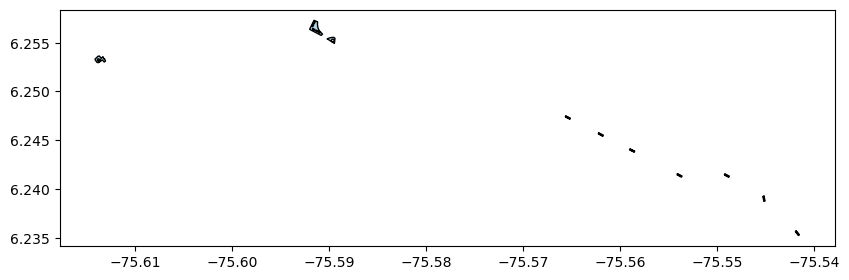

In [17]:
# Relations
transport_gdf[transport_gdf['osm_type']=='relations'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

##### Nodes

In [18]:
# Nodes
transport_gdf[transport_gdf['osm_type']=='nodes'].head()

osm_id osm_type smoothness railway layer building operator barrier  \
0  11123634286    nodes       None    None  None     None     None    None   
1   5544207994    nodes       None    None  None     None     None    None   
2   5546798575    nodes       None    None  None     None     None    None   
3   7140104917    nodes       None    None  None     None     None    None   
4  11136570090    nodes       None    None  None     None     None    None   

  capacity amenity  ... oneway  name public_transport   highway surface width  \
0     None    None  ...   None  None             None  crossing    None  None   
1     None    None  ...   None  None             None  crossing    None  None   
2     None    None  ...   None  None             None  crossing    None  None   
3     None    None  ...   None  None             None      stop    None  None   
4     None    None  ...   None  None             None  crossing    None  None   

  parking tunnel bridge                   geometry  
0    None   None   None  POINT (-75.56679 6.29879)  
1    None   None   None  POINT (-75.57358 6.30018)  
2    None   None   None  POINT (-75.56902 6.30616)  
3    None   None   None  POINT (-75.57021 6.30025)  
4    None   None   None  POINT (-75.57019 6.30034)  

[5 rows x 21 columns]

In [19]:
# Nodes
transport_gdf[transport_gdf['osm_type']=='nodes']['highway'].unique()

array(['crossing', 'stop', 'traffic_signals', 'bus_stop', 'street_lamp',
       None, 'give_way', 'speed_camera', 'turning_circle', 'turning_loop',
       'mini_roundabout', 'rest_area', 'elevator', 'traffic_mirror',
       'services', 'motorway_junction', 'steps'], dtype=object)

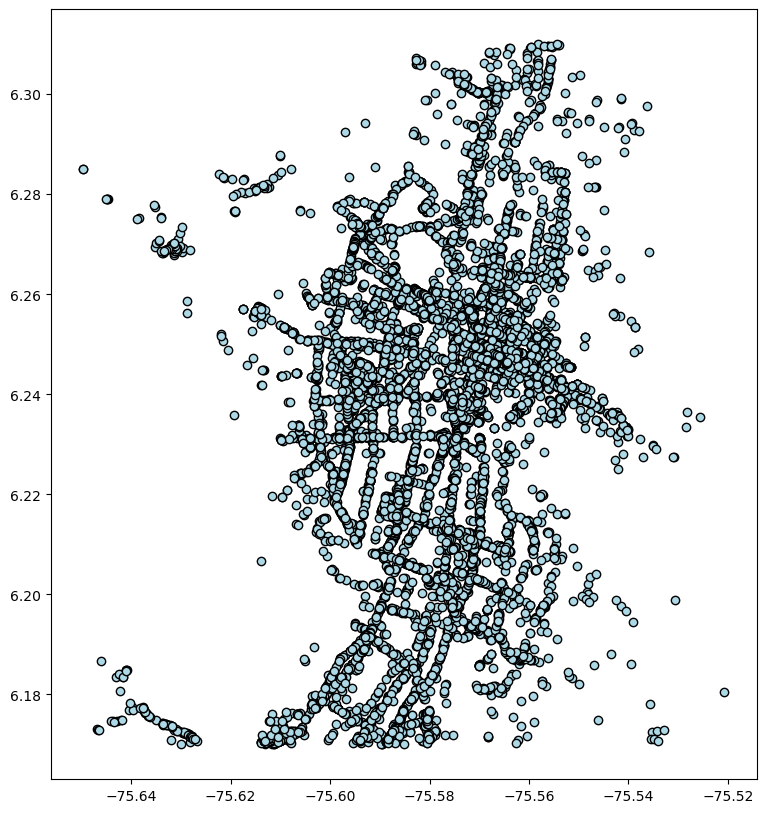

In [20]:
# Nodes
transport_gdf[transport_gdf['osm_type']=='nodes'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

##### Polygons

In [21]:
transport_gdf[transport_gdf['osm_type']=='ways_poly'].head()

osm_id   osm_type smoothness railway layer building   operator  \
45491   932914924  ways_poly       None    None  None      yes  Metroplús   
45492  1200962161  ways_poly       None    None  None     None       None   
45493  1200962151  ways_poly       None    None  None     None       None   
45494  1300680028  ways_poly       None    None  None     None       None   
45495  1302642520  ways_poly       None    None  None     None       None   

      barrier capacity      amenity  ... oneway          name  \
45491    None     None  bus_station  ...   None  Barrio Colón   
45492    None     None         None  ...   None          None   
45493    None     None         None  ...   None          None   
45494    None     None         None  ...   None          None   
45495    None     None         None  ...   None          None   

      public_transport  highway surface width parking tunnel bridge  \
45491          station     None    None  None    None   None   None   
45492             None  footway    None  None    None   None   None   
45493             None  footway    None  None    None   None   None   
45494             None  footway    None  None    None   None   None   
45495             None  footway    None  None    None   None   None   

                                                geometry  
45491  POLYGON ((-75.56996 6.24041, -75.56993 6.2404,...  
45492  POLYGON ((-75.59675 6.24057, -75.59669 6.2396,...  
45493  POLYGON ((-75.59683 6.23959, -75.59683 6.23953...  
45494  POLYGON ((-75.56909 6.2659, -75.56902 6.26589,...  
45495  POLYGON ((-75.56787 6.26761, -75.5678 6.2676, ...  

[5 rows x 21 columns]

In [22]:
# Nodes
transport_gdf[transport_gdf['osm_type']=='ways_poly']['highway'].unique()

array([None, 'footway', 'pedestrian', 'service', 'tertiary', 'secondary',
       'residential', 'cycleway', 'primary', 'path', 'unclassified',
       'steps', 'yes', 'elevator'], dtype=object)

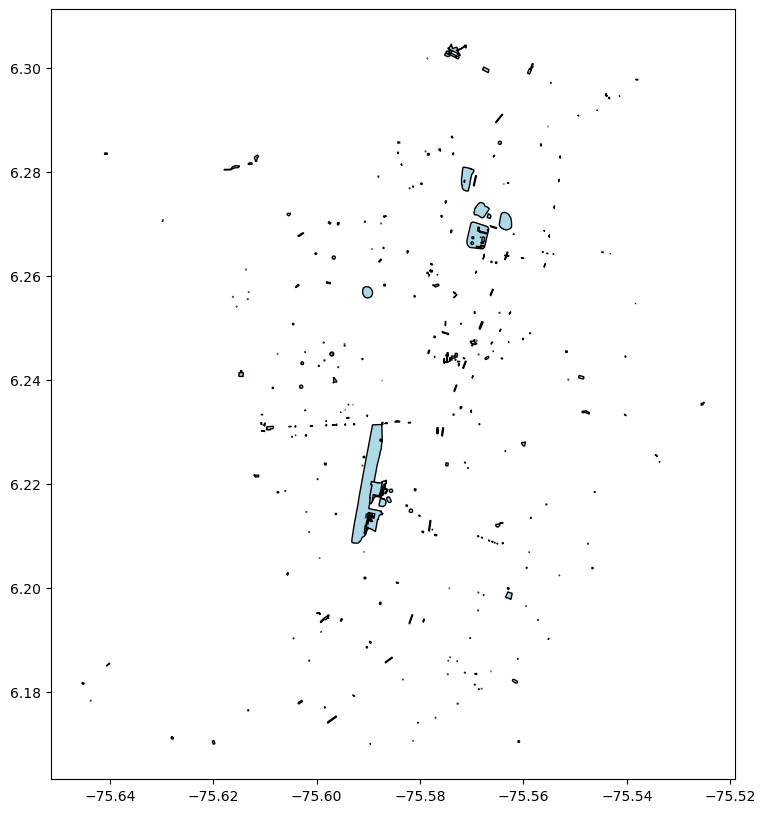

In [23]:
# Polygons
transport_gdf[transport_gdf['osm_type']=='ways_poly'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

##### Lines

In [24]:
transport_gdf[transport_gdf['osm_type']=='ways_line']

osm_id   osm_type smoothness railway layer building operator  \
8912    442836748  ways_line       None    None  None     None     None   
8913    388246118  ways_line       None    None  None     None     None   
8914   1292965867  ways_line       None    None  None     None     None   
8915   1130640893  ways_line       None    None  None     None     None   
8916   1292978632  ways_line       None    None  None     None     None   
...           ...        ...        ...     ...   ...      ...      ...   
45486    32600372  ways_line       None    None  None     None     None   
45487   714490764  ways_line       None    None  None     None     None   
45488   971077657  ways_line       None    None  None     None     None   
45489    33762251  ways_line       None    None  None     None     None   
45490  1293138083  ways_line       None    None  None     None     None   

      barrier capacity amenity  ... oneway           name public_transport  \
8912     None     None    None  ...   None  Calle 32B Sur             None   
8913     None     None    None  ...    yes    Carrera 47B             None   
8914     None     None    None  ...   None           None             None   
8915     None     None    None  ...   None           None             None   
8916     None     None    None  ...   None           None             None   
...       ...      ...     ...  ...    ...            ...              ...   
45486    None     None    None  ...    yes     Carrera 48             None   
45487    None     None    None  ...   None           None             None   
45488    None     None    None  ...   None           None             None   
45489    None     None    None  ...    yes   Calle 11 Sur             None   
45490    None     None    None  ...   None           None             None   

           highway  surface width parking tunnel bridge  \
8912       footway     None  None    None   None   None   
8913   residential  asphalt  None    None   None   None   
8914      cycleway     None  None    None   None   None   
8915       footway     None  None    None   None   None   
8916      cycleway     None  None    None   None   None   
...            ...      ...   ...     ...    ...    ...   
45486  residential  asphalt  None    None   None   None   
45487      footway     None  None    None   None   None   
45488      footway     None  None    None   None   None   
45489  residential  asphalt  None    None   None   None   
45490      footway     None  None    None   None   None   

                                                geometry  
8912   LINESTRING (-75.58978 6.17697, -75.58985 6.17703)  
8913   LINESTRING (-75.59335 6.17208, -75.59368 6.171...  
8914   LINESTRING (-75.59463 6.17543, -75.59401 6.175...  
8915   LINESTRING (-75.5882 6.17927, -75.58826 6.1793...  
8916   LINESTRING (-75.58321 6.18512, -75.58322 6.185...  
...                                                  ...  
45486  LINESTRING (-75.57892 6.1955, -75.57874 6.1958...  
45487  LINESTRING (-75.57901 6.19504, -75.57924 6.194...  
45488  LINESTRING (-75.58012 6.19466, -75.58005 6.194...  
45489  LINESTRING (-75.5796 6.19546, -75.58012 6.1956...  
45490  LINESTRING (-75.58246 6.19449, -75.58239 6.19456)  

[36579 rows x 21 columns]

In [25]:
# Lines
transport_gdf[transport_gdf['osm_type']=='ways_line']['highway'].unique()

array(['footway', 'residential', 'cycleway', 'primary_link', 'service',
       None, 'unclassified', 'tertiary', 'primary', 'secondary', 'steps',
       'trunk_link', 'tertiary_link', 'secondary_link', 'platform',
       'path', 'pedestrian', 'trunk', 'track', 'construction',
       'bridleway', 'corridor', 'proposed'], dtype=object)

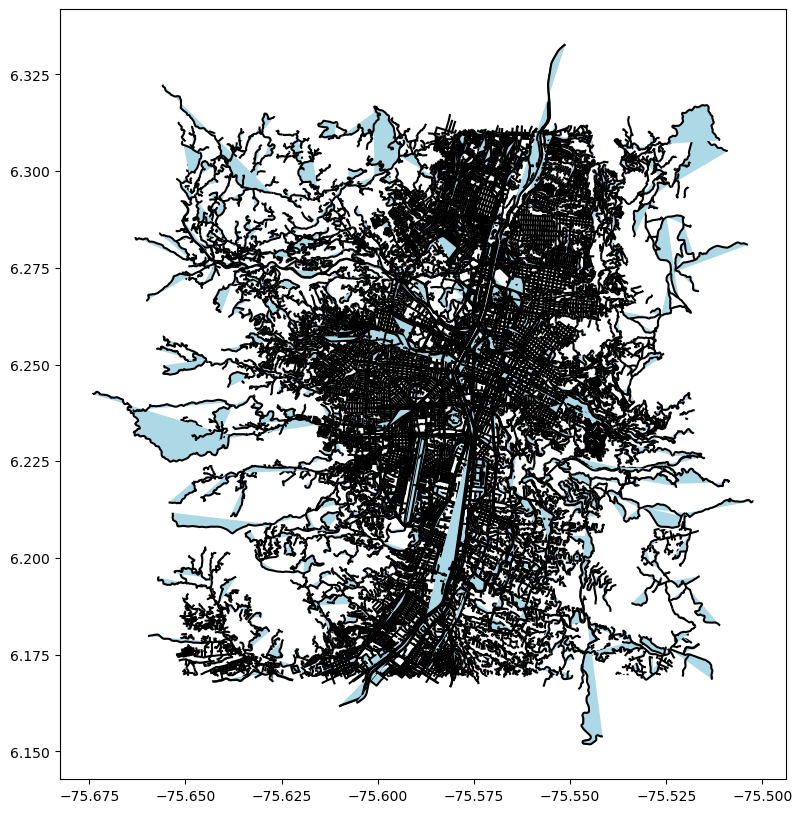

In [26]:
# Lines
transport_gdf[transport_gdf['osm_type']=='ways_line'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

## Data cleaning

In [27]:
# Droping relations
transport_clean_gdf = transport_gdf[~transport_gdf["osm_type"].isin(['nodes', 'ways_poly', 'relations'])]

## Pre processing

In [28]:
# CRS
transport_clean_gdf = transport_clean_gdf.to_crs(epsg=21897)

In [29]:
# Calculate length in meters
transport_clean_gdf['length'] = transport_clean_gdf.length


## Length measure by category

In [30]:
transport_clean_gdf.columns

Index(['osm_id', 'osm_type', 'smoothness', 'railway', 'layer', 'building',
       'operator', 'barrier', 'capacity', 'amenity', 'aeroway', 'oneway',
       'name', 'public_transport', 'highway', 'surface', 'width', 'parking',
       'tunnel', 'bridge', 'geometry', 'length'],
      dtype='object')

In [31]:
# Length grouping by category
groupby_highway = transport_clean_gdf.groupby('highway').agg(
    count=('highway', 'size'),  # Count the number of rows per category
    total_length=('length', 'sum')  # Sum the 'value' column per category
).reset_index()

# Sort by length
groupby_highway.sort_values(by="total_length", ascending=False, inplace=True)

In [32]:
# Rankings by total length
groupby_highway

highway  count  total_length
11     residential  11334  1.515643e+06
4          footway   6886  6.412605e+05
14         service   7137  4.860348e+05
16        tertiary   3249  3.775744e+05
12       secondary   1613  2.078434e+05
21    unclassified    544  1.803528e+05
8          primary   1139  1.530738e+05
5             path    750  1.133768e+05
19           trunk    347  8.604427e+04
3         cycleway    680  8.027832e+04
6       pedestrian    542  5.419015e+04
15           steps    991  4.349730e+04
9     primary_link    441  3.085049e+04
18           track     79  2.410346e+04
20      trunk_link    263  2.403216e+04
13  secondary_link    243  1.222003e+04
17   tertiary_link    117  3.263355e+03
0        bridleway     10  2.667549e+03
7         platform     28  1.831024e+03
1     construction      3  4.071220e+02
10        proposed      1  2.057846e+02
2         corridor      4  9.057675e+01

#### Visual output by category

##### Residencial

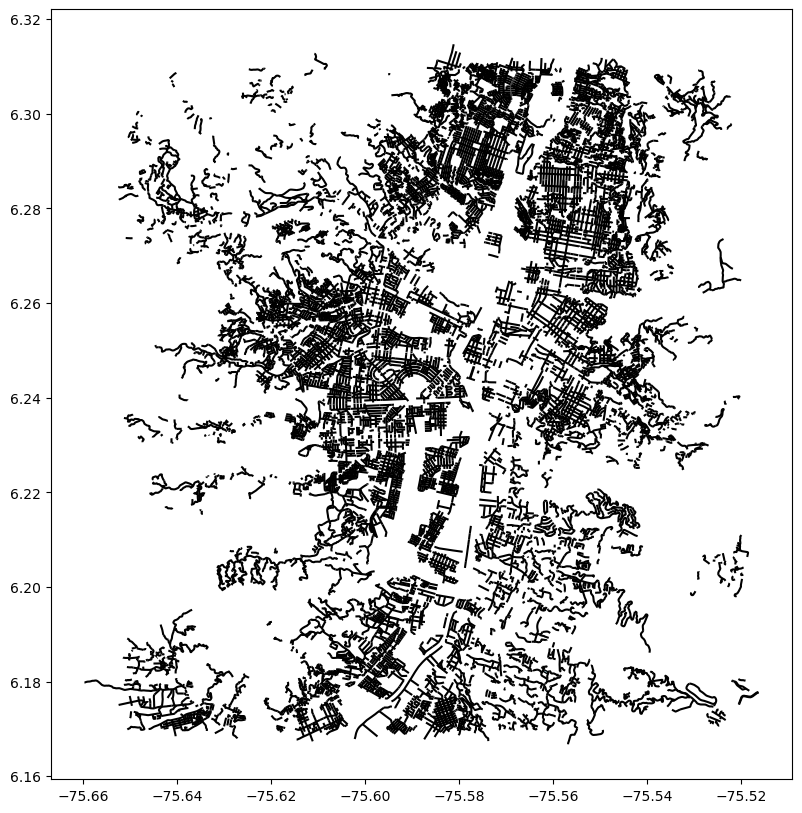

In [33]:
# Residencial
transport_gdf[transport_gdf['highway']=='residential'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

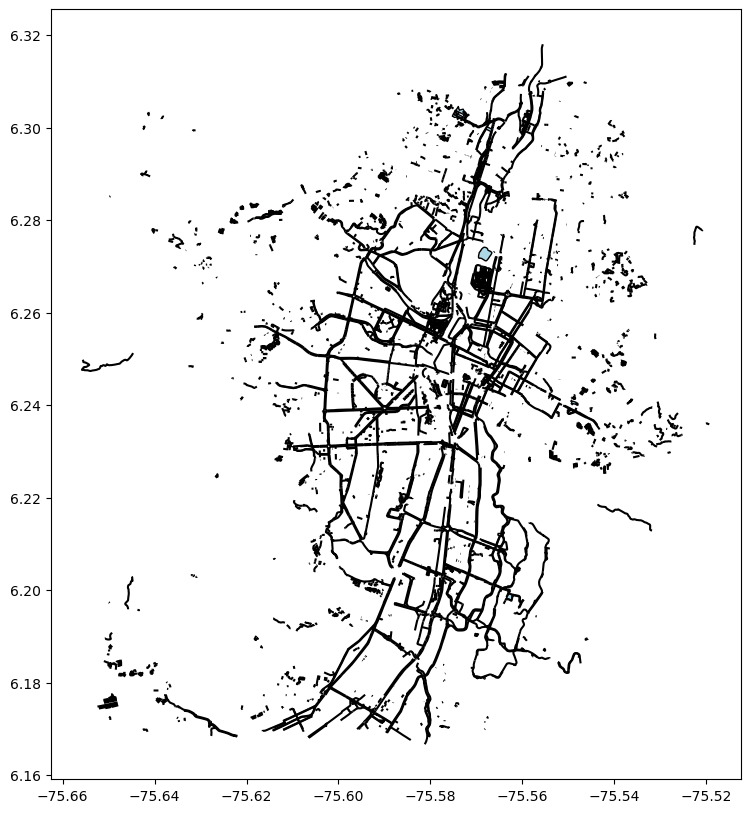

In [34]:
# Footway
transport_gdf[transport_gdf['highway']=='footway'].plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.show()

## Visual output

In [35]:
categories = groupby_highway['highway'].head(10).unique()

In [36]:
categories

array(['residential', 'footway', 'service', 'tertiary', 'secondary',
       'unclassified', 'primary', 'path', 'trunk', 'cycleway'],
      dtype=object)

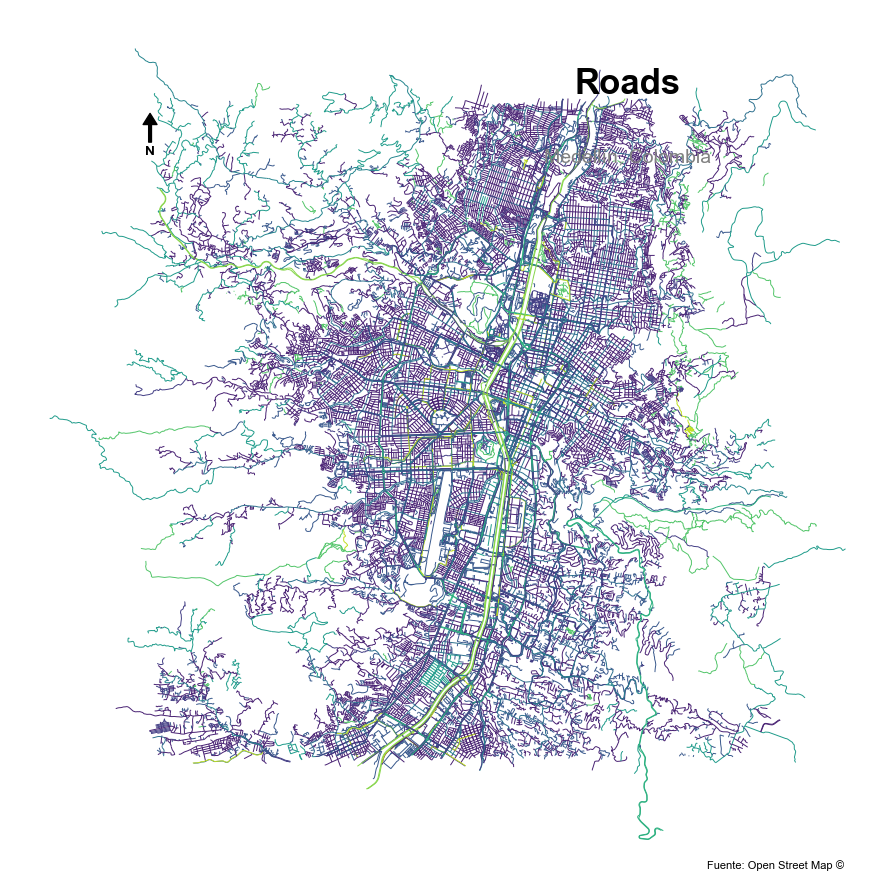

In [51]:
# Create figure and axis
fig, ax = plt.subplots(1,1, figsize=(12,9))

# Set font properties globally
plt.rcParams['font.family'] = 'sans-serif'  # Choose a font family
plt.rcParams['font.sans-serif'] = 'Arial'

# Create custom patches for legend


# Plot the geometries
# Set color palette
# Define the 'mako' color palette with as many colors as unique categories in your column
categories = categories = groupby_highway['highway'].head(10).unique()
palette = sns.color_palette("viridis", len(categories))

# Map each category to a color
category_to_color = dict(zip(categories, palette))
transport_clean_gdf['color'] = transport_clean_gdf['highway'].map(category_to_color)

# Subset
transport_clean_gdf = transport_clean_gdf[transport_clean_gdf['highway'].isin(categories)]

# Plot the GeoDataFrame using the color map
transport_clean_gdf.plot(color=transport_clean_gdf['color'], linewidth=0.7, ax=ax, legend=False)
# transport_clean_gdf[transport_clean_gdf['highway']=='residential'].plot(edgecolor="lightblue", facecolor="lightblue", ax=ax)


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Limits on axis
# X axis
# x_min = 822335.6502660483
# x_max = 843244.074497458
# # Y axis
# y_min = 1171303.0554514383
# y_max = 1192082.9971129675


# Draw north arrow
# Get plot limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Customize arrow position and style
x_arrow = x_min + (x_max - x_min) * 0.16  # 90% across x-axis
y_arrow = y_min + (y_max - y_min) * 0.88  # 95% up y-axis
arrow_size = (y_max - y_min) * 0.05  # Adjust arrow size

# Draw north arrow with more customization
ax.annotate('N', 
            xy=(x_arrow, y_arrow), 
            xytext=(x_arrow, y_arrow - arrow_size),
            arrowprops=dict(
                facecolor='black',  # Arrow color
                edgecolor=None,    # Border color
                width=2,            # Arrow width
                headwidth=10,       # Width of arrowhead
                headlength=8        # Length of arrowhead
            ),
            ha='center', 
            va='bottom',
            fontweight='bold',      # Bold 'N' text
            fontsize=10             # Text size
)


# # Add scale bar
# scale_bar = ScaleBar(2, location='lower center')  # 1 represents the units in meters/degrees
# ax.add_artist(scale_bar)

# # Create custom legend entries with different marker styles
# comunas_patch = mlines.Line2D([], [], color='lightblue', 
#                                markerfacecolor='lightblue',
#                                marker='s', 
#                                markersize=8, 
#                                label='Comunas', 
#                                linestyle='None')
# d1_patch = mlines.Line2D([], [], color='white', 
#                          markerfacecolor='#E90729',
#                          marker='o', 
#                          markersize=8, 
#                          label='Tiendas D1', 
#                          linestyle='None')
# exito_patch = mlines.Line2D([], [], color='black', 
#                             markerfacecolor='#FFE800',
#                             marker='o', 
#                             markersize=8, 
#                             label='Tiendas Almacenes Éxito', 
#                             linestyle='None')

# # Add legend
# legend = ax.legend(
#     handles=[comunas_patch, d1_patch, exito_patch],
#     title='Legenda',
#     bbox_to_anchor=(0.97, 0.13),
#     title_fontsize=10,
#     fontsize=8
# )

plt.figtext(0.65, 0.9, 'Roads', 
            ha='center', 
            va='center', 
            fontsize=25, 
            fontweight='bold')

plt.figtext(0.65, 0.82, 'Medellín, Colombia', 
            ha='center', 
            va='center', 
            fontsize=14, 
            color='gray')




# Add a text annotation for the data source
data_source_text = "Fuente: Open Street Map ©"
ax.text(0.875, 0.01, data_source_text, fontsize=8, ha='center', va='bottom', transform=ax.transAxes)


plt.tight_layout()  # Adjust layout to prevent cutting off the legend

plt.savefig('Roads.png', format='png', dpi=300)

plt.show()

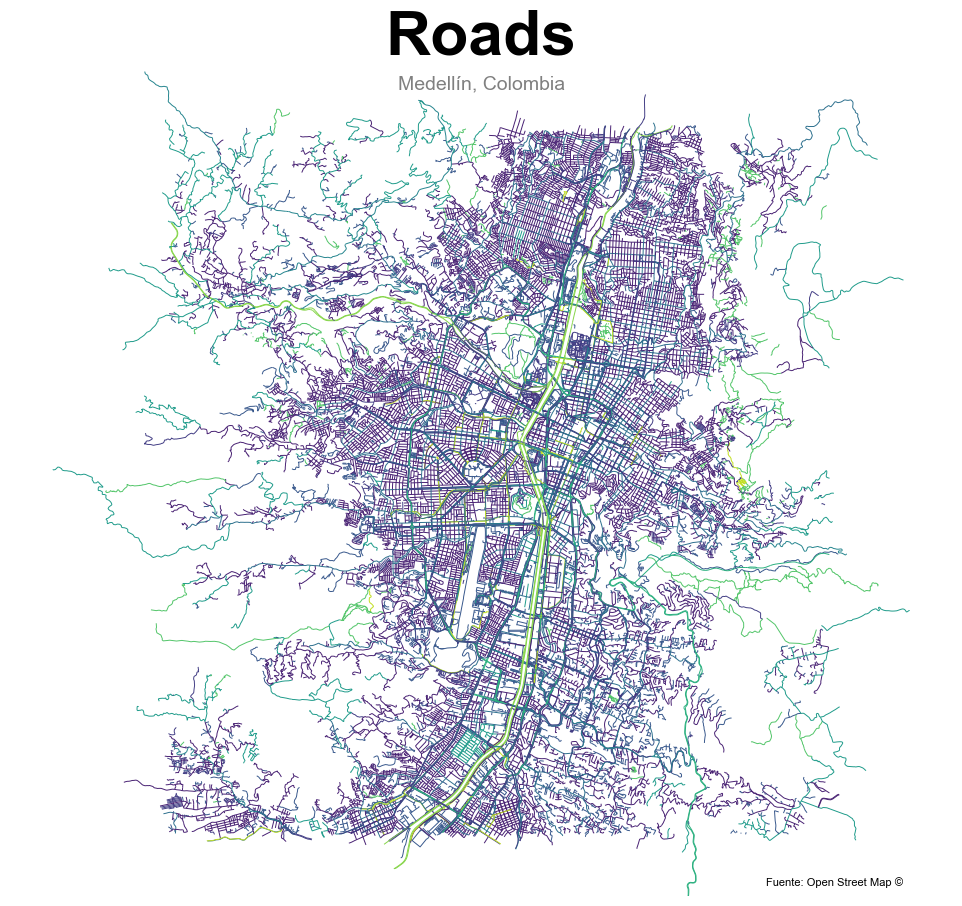

In [90]:
# Create figure and axis
fig, ax = plt.subplots(1,1, figsize=(12,9))

# Set font properties globally
plt.rcParams['font.family'] = 'sans-serif'  # Choose a font family
plt.rcParams['font.sans-serif'] = 'Arial'

# Create custom patches for legend


# Plot the geometries
# Set color palette
# Define the 'mako' color palette with as many colors as unique categories in your column
categories = categories = groupby_highway['highway'].head(10).unique()
palette = sns.color_palette("viridis", len(categories))

# Map each category to a color
category_to_color = dict(zip(categories, palette))
transport_clean_gdf['color'] = transport_clean_gdf['highway'].map(category_to_color)

# Subset
transport_clean_gdf = transport_clean_gdf[transport_clean_gdf['highway'].isin(categories)]

# Plot the GeoDataFrame using the color map
transport_clean_gdf.plot(color=transport_clean_gdf['color'], linewidth=0.7, ax=ax, legend=False)
# transport_clean_gdf[transport_clean_gdf['highway']=='residential'].plot(edgecolor="lightblue", facecolor="lightblue", ax=ax)


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Limits on axis


# X axis
xmin = 822335.6502660483
xmax = 843244.074497458
# Y axis
ymin = 1172850
ymax = 1192150

ax.set_xlim([xmin, xmax])  # Replace xmin and xmax with desired values
ax.set_ylim([ymin, ymax])  # Replace ymin and ymax with desired values



# # Draw north arrow
# # Get plot limits
# x_min, x_max = ax.get_xlim()
# y_min, y_max = ax.get_ylim()

# # Customize arrow position and style
# x_arrow = x_min + (x_max - x_min) * 0.16  # 90% across x-axis
# y_arrow = y_min + (y_max - y_min) * 0.88  # 95% up y-axis
# arrow_size = (y_max - y_min) * 0.05  # Adjust arrow size

# # Draw north arrow with more customization
# ax.annotate('N', 
#             xy=(x_arrow, y_arrow), 
#             xytext=(x_arrow, y_arrow - arrow_size),
#             arrowprops=dict(
#                 facecolor='black',  # Arrow color
#                 edgecolor=None,    # Border color
#                 width=2,            # Arrow width
#                 headwidth=10,       # Width of arrowhead
#                 headlength=8        # Length of arrowhead
#             ),
#             ha='center', 
#             va='bottom',
#             fontweight='bold',      # Bold 'N' text
#             fontsize=10             # Text size
# )



plt.figtext(0.5, 0.97, 'Roads', 
            ha='center', 
            va='center', 
            fontsize=45, 
            fontweight='bold')

plt.figtext(0.5, 0.92, 'Medellín, Colombia', 
            ha='center', 
            va='center', 
            fontsize=14, 
            color='gray')




# Add a text annotation for the data source
data_source_text = "Fuente: Open Street Map ©"
ax.text(0.875, 0.01, data_source_text, fontsize=8, ha='center', va='bottom', transform=ax.transAxes)


plt.tight_layout()  # Adjust layout to prevent cutting off the legend

plt.savefig('Roads.png', format='png', dpi=300)

plt.show()

In [50]:
y_max

1192082.9971129675

In [59]:
y_min

1171303.0554514383